<a href="https://colab.research.google.com/github/wulanwidiasari/PVCK_Genap_2022/blob/main/Week03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

# Acessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 75


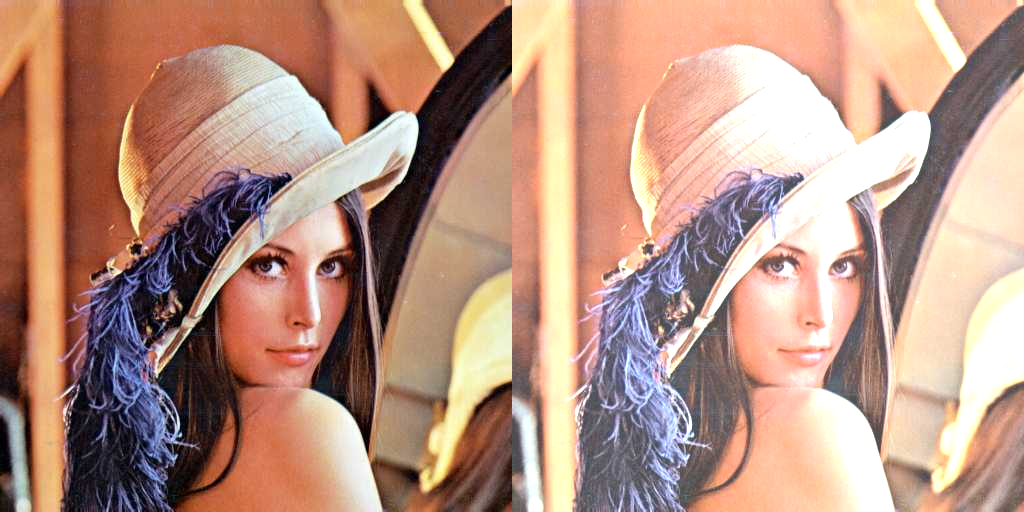

In [3]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/lena.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.converScaleAbs(original, brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

TUGAS

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 65
Masukkan kontras [1.0 - 3.0]: 2


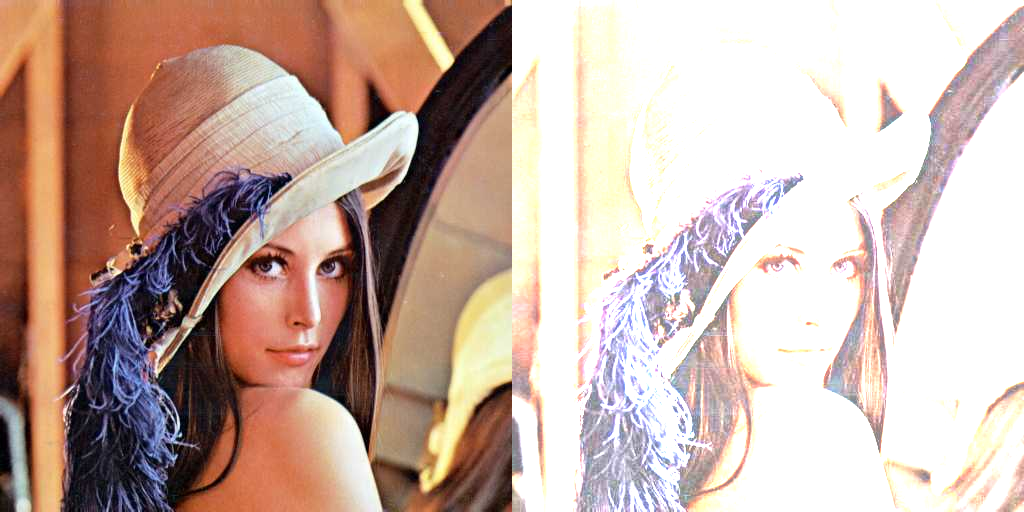

In [4]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/lena.jpg')
final_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      final_image[y, x, c] = np.clip(contrast * (original[y, x, c] + brightness), 0, 255)

#cara simple tanpa for loop
#final_frame = cv.converScaleAbs(original, contrast, brightness)

final_frame = cv.hconcat((original, final_image))
cv2_imshow(final_frame)

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------
Masukkan tingkat kecerahan: 30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log


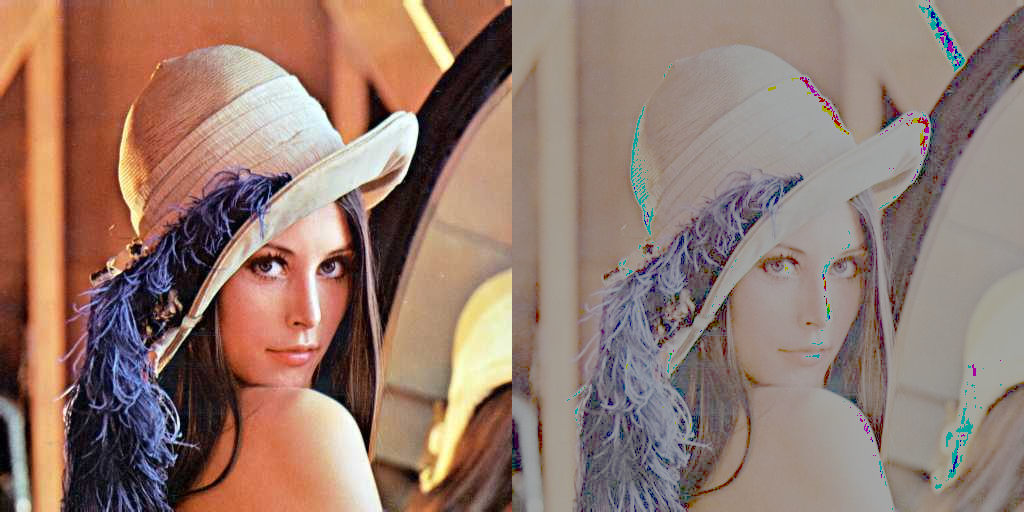

In [6]:
# import math

# # Compute log
# def logTransform(c, f):
#     g = c * math.log(float(1 + f), r_value);
#     return g;

print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------')
try:
  r_value = int(input('Masukkan tingkat kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/lena.jpg')
log_image = np.zeros(original.shape, original.dtype)

# c = 255/math.log(255+1, r_value);

# #akses per piksel
# for y in range(original.shape[0]):
#   for x in range(original.shape[1]):
#     for clr in range(original.shape[2]):
#       clrLog = round(logTransform(c, clr));
#       final_image[y, x, clr] = np.clip(original[y, x, clrLog], 0, 255)

#cara simple tanpa for loop
c = r_value
log_image = c * (np.log(original + 1))

log_image = np.array(log_image, dtype = np.uint8)

final_frame = cv.hconcat((original, log_image))
cv2_imshow(final_frame)

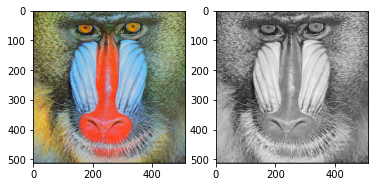

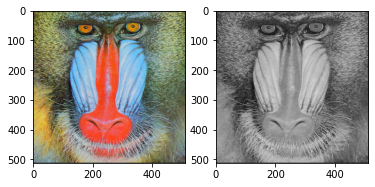

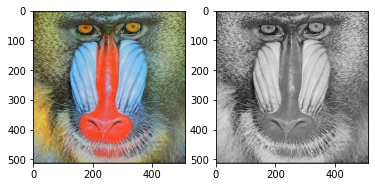

In [7]:
original = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
lightness_img = np.zeros(original.shape, original.dtype)
# Averaging
def conv_averaging(img_ori):
  grayValue = (img_ori[:,:,0] / 3) + (img_ori[:,:,1] / 3) + (img_ori[:,:,2] / 3)
  averaging_img = grayValue.astype(np.uint8)
  return averaging_img
averaging = conv_averaging(original)
fix, ax = plt.subplots(1, 2)
ax[0].imshow(original)
ax[1].imshow(averaging, cmap='gray')

# Lightness
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    lightness_img[y,x,:] = int((max(original[y,x,:]) / 2) + (min(original[y,x,:]) / 2))
fix, ax = plt.subplots(1, 2)
ax[0].imshow(original)
ax[1].imshow(lightness_img, cmap='gray')

# Luminance
def conv_luminance(img_ori):
  grayValue = (0.2126 * img_ori[:,:,0]) + (0.7152 * img_ori[:,:,1]) + (0.0722 * img_ori[:,:,2])
  luminance_img = grayValue.astype(np.uint8)
  return luminance_img
luminance = conv_luminance(original)
fix, ax = plt.subplots(1, 2)
ax[0].imshow(original)
ax[1].imshow(luminance, cmap='gray')

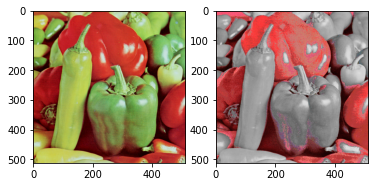

In [17]:
original = cv.imread('/content/drive/MyDrive/Images/peppers.tiff')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)

lower_range = np.array([0,0,0]) 
upper_range = np.array([255,110,120])   
mask = cv.inRange(original,lower_range,upper_range) 
result = cv.bitwise_and(original,original,mask = mask)  

bw = cv.cvtColor(original,cv.COLOR_BGR2GRAY)  
bw_bgr = cv.cvtColor(bw,cv.COLOR_GRAY2BGR)
result2 = cv.bitwise_or(bw_bgr,result) 

fix, ax = plt.subplots(1, 2)
ax[0].imshow(original)
ax[1].imshow(result2)
